# Acoustic and auditory properties of speech sounds
[6]

LING 497 Phonetic Analysis: Articulation, Acoustics, Audition

The Pennsylvania State University

[Prof. Deborah Morton](https://deborahcmorton.wordpress.com/)

---

```{admonition} Revised
31 May 2023
```
```{contents}
```

---

## Programming Environment

In [2]:
R.version.string # R.Version()
.libPaths()

packages <- c(
  'gridExtra',
  'magrittr',
  'phonR',
  'repr',
  'scales',
  'tidyverse',
  'vowels'
)

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Load packages
invisible(lapply(packages, library, character.only = TRUE))

[1] "R version 4.3.0 (2023-04-21)"

[1] "/Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library"

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ dplyr::combine()    masks gridExtra::combine()
✖ purrr::discard()    masks scales::discard()
✖ tidyr::extract()    masks magrittr::extract()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::set_names()  masks magrittr::set_names()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


---

## Zürich German Vowels

### F1, F2, F3 observations

In [18]:
zurich_obs <- tibble(
  vowel=c(
    'i',
    'ə',
    'e',
    'ə',
    'ɛ',
    'æ',
    'y',
    'i',
    'ø',
    'ə',
    'œ',
    'u',
    'o',
    'e',
    'ɒ',
    #'ə',
    'ɛ',
    'ə'
  ),
  F1=c(
    338.16187273454796,
    480.7556674103058,
    424.66126677493634,
    538.1591157503162,
    463.38752300516285,
    598.999109334512,
    302.9120756513271,
    329.88108480049857,
    353.53535533589655,
    446.42169736756864,
    556.2410818865662,
    321.5929606643981,
    449.0585597667322,
    548.722113940993,
    713.4208029323668,
    #187.75184574884526,
    554.6995123825042,
    596.080905107178
  ),
  F2=c(
    2311.1416044007174,
    1652.5340593428432,
    2151.9276688278355,
    1728.5344176651327,
    1729.503265799448,
    1485.5932775168874,
    1627.843171042086,
    2399.5911272550698,
    1654.6924476415286,
    1762.7512749856016,
    1437.2258145596832,
    684.098976469662,
    642.100611328256,
    1450.566949891477,
    1564.501521174171,
    #1712.5591032845734,
    1966.4625997243281,
    1591.8669959965687
  ),
  F3=c(
    3176.602722306821,
    2390.0982442637264,
    2750.2485307364627,
    2455.5321017313545,
    2380.506763486331,
    2374.372678732871,
    2094.16654646834,
    3370.1561689997457,
    2219.494510301964,
    2305.844777075152,
    2492.393145497456,
    2599.4447548048465,
    2626.705175493852,
    2537.6593241203104,
    3090.8585123150892,
    #2703.87531734647,
    2496.1083788172814,
    2502.8814824649626
  )
)
zurich_obs

vowel,F1,F2,F3
<chr>,<dbl>,<dbl>,<dbl>
i,338.1619,2311.1416,3176.603
ə,480.7557,1652.5341,2390.098
e,424.6613,2151.9277,2750.249
ə,538.1591,1728.5344,2455.532
ɛ,463.3875,1729.5033,2380.507
æ,598.9991,1485.5933,2374.373
y,302.9121,1627.8432,2094.167
i,329.8811,2399.5911,3370.156
ø,353.5354,1654.6924,2219.495


### F1, F2, F3 averages

In [19]:
zurich_avg <- zurich_obs %>%
                group_by(vowel) %>%
                  summarize(F1=mean(F1),F2=mean(F2),F3=mean(F3))
zurich_avg

vowel,F1,F2,F3
<chr>,<dbl>,<dbl>,<dbl>
e,486.6917,1801.2473,2643.954
i,334.0215,2355.3664,3273.379
o,449.0586,642.1006,2626.705
u,321.5930,684.0990,2599.445
y,302.9121,1627.8432,2094.167
æ,598.9991,1485.5933,2374.373
ø,353.5354,1654.6924,2219.495
œ,556.2411,1437.2258,2492.393
ɒ,713.4208,1564.5015,3090.859


### Visualization of the F1-F2 acoustic vowel space

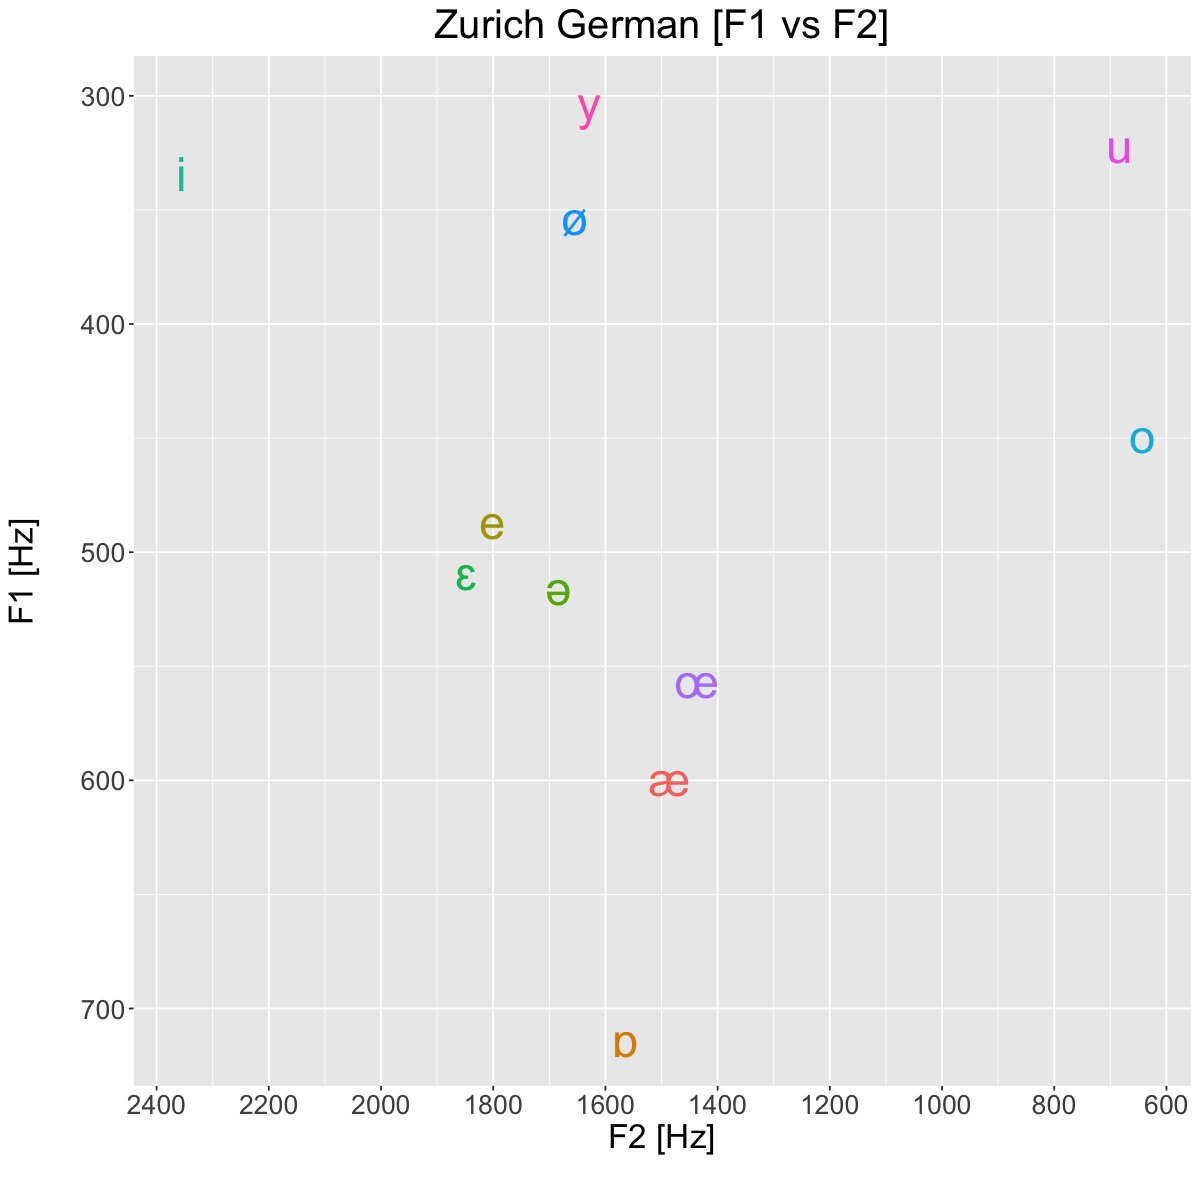

In [20]:
options(repr.plot.width=10, repr.plot.height=10)

plt <- ggplot(zurich_avg, aes(x=F2, y=F1, label=vowel, color=vowel)) +
  geom_text(size=10) +
  scale_x_reverse(
      position='bottom',
      breaks=seq(0, 3000, 200)) +
  scale_y_reverse(
      position='left',
      breaks=seq(0, 1000, 100)) +
  labs(
    x='F2 [Hz]\n',
    y='F1 [Hz]\n',
    title='Zurich German [F1 vs F2]') +
  theme(
    legend.position='none',
    plot.title=element_text(hjust=0.5),
    text=element_text(size=20)
  )

suppressWarnings(print(plt))

### Analysis

[1] Which pairs of vowels look like they are close together and are potentially confusable? (No less than three pairs.)

* the [near-open front unrounded vowel](https://en.wikipedia.org/wiki/Near-open_front_unrounded_vowel) [æ] and the [open front rounded vowel](https://en.wikipedia.org/wiki/Open_front_rounded_vowel) [œ]
* the [close-mid front unrounded vowel](https://en.wikipedia.org/wiki/Close-mid_front_unrounded_vowel) [e] and the [open-mid front unrounded vowel](https://en.wikipedia.org/wiki/Open-mid_front_unrounded_vowel) [ɛ]
* the [close-mid front rounded vowel](https://en.wikipedia.org/wiki/Close-mid_front_rounded_vowel) [ø] and the [close front rounded vowel](https://en.wikipedia.org/wiki/Close_front_rounded_vowel) [y]

[2] Examine F3 for each pair of vowels. Do you think F3 might help speakers distinguish the vowel pairs from one another? Why or why not?



In [3]:
zurich_avg %>%
  select(vowel,F3) %>%
    slice(1,5,6,7,8,11)

vowel,F3
<chr>,<dbl>
e,2643.954
y,2094.167
æ,2374.373
ø,2219.495
œ,2492.393
ɛ,2438.308


[3] Do you think any other acoustic cues underlie the observed vowel differences? If so, which ones?


[4] Do you think an auditory plot would show differences not seen in the acoustic plot? Why or why not?

---

## Quechua Stops

Salasaca Quechua has a three-way contrast in stop phonemes between voiceless, voiceless aspirated, and voiced stops.

Measure the VOT

[p]

[ph]

[b]

[t]

[th]

[d]

[k]

[kh]

[g]

### VOT observations

In [11]:
quechua_obs <- tribble(
    ~token,~stop,     ~vot,
   'pungu',  'p', 0.015893,
   'pungu',  'g', 0.033120,
  'patsuk',  'p', 0.009725,
    'sipu',  'p', 0.021879,
   'phaki', 'ph', 0.039716,
   'phaki',  'k', 0.035454,
   'bunga',  'b',-0.132969,
   'bunga',  'g', 0.021412,
  'wasibi',  'b', 0.0,
    'taki',  't', 0.019589,
    'taki',  'k', 0.036247,
    'tuta',  't', 0.020096,
    'tuta',  't', 0.012146,
  'thuktu', 'th', 0.032266,
  'thuktu',  't', 0.015750,
    'dali',  'd',-0.105084,
  'tshida',  'd', 0.0,
  'kushni',  'k', 0.035806,
   'wajku',  'k', 0.025784,
   'khata', 'kh', 0.053653,
   'khata',  't', 0.014999,
     'gan',  'g',-0.165850,
   'tawga',  't', 0.015944,
   'tawga',  'g', 0.0,
)
quechua_obs

token,stop,vot
<chr>,<chr>,<dbl>
pungu,p,0.015893
pungu,g,0.033120
patsuk,p,0.009725
sipu,p,0.021879
phaki,ph,0.039716
phaki,k,0.035454
bunga,b,-0.132969
bunga,g,0.021412
wasibi,b,0.000000


### VOT averages

In [12]:
quechua_avg <- quechua_obs %>%
                group_by(stop) %>%
                  summarize(vot=mean(vot))
quechua_avg

stop,vot
<chr>,<dbl>
b,-0.06648450
d,-0.05254200
g,-0.02782950
k,0.03332275
kh,0.05365300
p,0.01583233
ph,0.03971600
t,0.01642067
th,0.03226600


### Spectrograms

`````{tab-set}
````{tab-item} [p]ungu
![](img/L6_00_pungu1.png)
````
````{tab-item} pun[g]u
![](img/L6_00_pungu2.png)
````
````{tab-item} [p]atsuk
![](img/L6_01_patsuk.png)
````
````{tab-item} si[p]u
![](img/L6_02_sipu.png)
````
````{tab-item} [ph]aki
![](img/L6_03_phaki1.png)
````
````{tab-item} pha[k]i
![](img/L6_03_phaki2.png)
````
````{tab-item} [b]unga
![](img/L6_04_bunga1.png)
````
````{tab-item} bun[g]a
![](img/L6_04_bunga2.png)
````
````{tab-item} wasi[b]i
![](img/L6_05_wasibi.png)
````
````{tab-item} [t]aki
![](img/L6_06_taki1.png)
````
````{tab-item} ta[k]i
![](img/L6_06_taki2.png)
````
````{tab-item} [t]uta
![](img/L6_07_tuta1.png)
````
````{tab-item} tu[t]a
![](img/L6_07_tuta2.png)
````
````{tab-item} [th]uktu
![](img/L6_08_thuktu1.png)
````
````{tab-item} thuk[t]u
![](img/L6_08_thuktu2.png)
````
````{tab-item} dali
![](img/L6_09_dali.png)
````
````{tab-item} tshi[d]a
![](img/L6_10_tshida.png)
````
````{tab-item} [k]ushni
![](img/L6_11_kushni.png)
````
````{tab-item} wajku
![](img/L6_12_wajku.png)
````
````{tab-item} [kh]ata
![](img/L6_13_khata1.png)
````
````{tab-item} kha[t]a
![](img/L6_13_khata2.png)
````
````{tab-item} [g]an
![](img/L6_14_gan.png)
````
````{tab-item} [t]awga
![](img/L6_15_tawga1.png)
````
````{tab-item} taw[g]a
![](img/L6_15_tawga2.png)
````
`````

### Analysis

[1] If you only saw the VOT patterns without any transcription, would you think there was a three-way contrast? Why or why not?

[2] Do you think that any acoustic cues other than VOT play a role in these contrasts?

---

## Korean Fricatives

Examine the phonetic correlates of a cross-linguistically unsual voiceless alveolar fricative constrast in Korean:

[sʰ] lenis aspirated fricative

[ss] fortis fricative

Which acoustic cues appear to be relevant to speaker-listeners' perception in distinguishing the fricatives? Which ones don't?

### Acoustic cue measurements

In [17]:
korean <- tribble(
  ~token,~duration_ms,~F0_transition_Hz,~spectral_peak_Hz,~spectral_peak_dB,~H1_Hz,~H1_dB,~H2_Hz,~H2_dB,
  '[sʰ]',    0.208705,              125,          4347.11,             28.5,235.19,  43.6,841.14,  39.6,
  '[ss]',    0.213125,              128,          4449.29,             36.6,226.67,  46.2,834.28,  46.1
)
korean %>%
  mutate(
    H1_minus_H2_dB = H1_dB - H2_dB
  )

token,duration_ms,F0_transition_Hz,spectral_peak_Hz,spectral_peak_dB,H1_Hz,H1_dB,H2_Hz,H2_dB,H1_minus_H2_dB
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
[sʰ],0.208705,125,4347.11,28.5,235.19,43.6,841.14,39.6,4.0
[ss],0.213125,128,4449.29,36.6,226.67,46.2,834.28,46.1,0.1


### Spectrograms and power spectra

`````{tab-set}
````{tab-item} [sʰ] duration
![](img/L6_20_sh_duration.png)
````
````{tab-item} [ss] duration
![](img/L6_21_ss_duration.png)
````
````{tab-item} [sʰ] spectral slice
![](img/L6_22_sh_spectral_slice.png)
````
````{tab-item} [ss] spectral slice
![](img/L6_23_ss_spectral_slice.png)
````
````{tab-item} [sʰ] spectral peak
![](img/L6_24_sh_spectral_peak.png)
````
````{tab-item} [ss] spectral peak
![](img/L6_25_ss_spectral_peak.png)
````
````{tab-item} sʰ[a] spectral slice
![](img/L6_26_sha_spectral_slice.png)
````
````{tab-item} ss[a] spectral slice
![](img/L6_29_ssa_spectral_slice.png)
````
````{tab-item} sʰ[a] H1
![](img/L6_27_sha_H1.png)
````
````{tab-item} sʰ[a] H2
![](img/L6_28_sha_H2.png)
````
````{tab-item} ss[a] H1
![](img/L6_30_ssa_H1.png)
````
````{tab-item} ss[a] H2
![](img/L6_31_ssa_H2.png)
````
`````

---

## Central Arrernte Nasals

Central Arrernte is an aboriginal Australian language that has nasal phonemes at many places of articulation.

Examine the formant and antiformant properties of the nasal. (Note: A final epenthetic vowel [a] may be heard at the end of consonant-final words pronounced in isolation, but is not included in the transcription.)

[m] [bilabial](https://en.wikipedia.org/wiki/Voiced_bilabial_nasal)

[ŋ] [velar](https://en.wikipedia.org/wiki/Voiced_velar_nasal)

[n̪] [dental](https://en.wikipedia.org/wiki/Voiced_dental,_alveolar_and_postalveolar_nasals)

[n] [apicoalveolar](https://en.wikipedia.org/wiki/Voiced_dental,_alveolar_and_postalveolar_nasals)

[ɲ] [palatal](https://en.wikipedia.org/wiki/Voiced_palatal_nasal)

[ɳ] [retroflex](https://en.wikipedia.org/wiki/Voiced_retroflex_nasal)

### F1, F2, F3 observations

In [22]:
arrernte_obs <- tribble(
    ~token,~nasal,            ~F1_Hz,            ~F2_Hz,           ~F3_Hz,
  '[aməŋ]',   'm',285.2174050473007,1542.6186253059136,2431.579956472647,
  '[aməŋ]',   'ŋ',405.2672201535346,2535.1062570576146,2605.047099678809,
  '[an̪ək]',   'n̪',280.2019747834746,1689.4191253832691,2615.092986757470,
  '[aɲək]',   'ɲ',329.7587005075927,2379.2648129406225,3247.250092150123,
  '[anək]',   'n',322.6723066332579,1699.6822986841912,2534.886655673502,
  '[aɳək]',   'ɳ',349.1755943432434,2380.2786511502973,4208.140362545317,
  '[aŋək]',   'ŋ',344.2634488457356,1173.2307520047038,2555.466245180057
)
arrernte_obs

token,nasal,F1_Hz,F2_Hz,F3_Hz
<chr>,<chr>,<dbl>,<dbl>,<dbl>
[aməŋ],m,285.2174,1542.619,2431.580
[aməŋ],ŋ,405.2672,2535.106,2605.047
[an̪ək],n̪,280.2020,1689.419,2615.093
[aɲək],ɲ,329.7587,2379.265,3247.250
[anək],n,322.6723,1699.682,2534.887
[aɳək],ɳ,349.1756,2380.279,4208.140
[aŋək],ŋ,344.2634,1173.231,2555.466


### F1, F2, F3 averages

In [24]:
arrernte_avg <- arrernte_obs %>%
                  group_by(nasal) %>%
                    summarize(F1_Hz=mean(F1_Hz),F2_Hz=mean(F2_Hz),F3_Hz=mean(F3_Hz))
arrernte_avg

nasal,F1_Hz,F2_Hz,F3_Hz
<chr>,<dbl>,<dbl>,<dbl>
m,285.2174,1542.619,2431.580
n,322.6723,1699.682,2534.887
n̪,280.2020,1689.419,2615.093
ŋ,374.7653,1854.169,2580.257
ɲ,329.7587,2379.265,3247.250
ɳ,349.1756,2380.279,4208.140


### Spectrograms

`````{tab-set}
````{tab-item} a[m]əŋ
![](img/L6_50.png)
````
````{tab-item} amə[ŋ]
![](img/L6_51.png)
````
````{tab-item} a[n̪]ək
![](img/L6_52.png)
````
````{tab-item} a[ɲ]ək
![](img/L6_53.png)
````
````{tab-item} a[n]ək
![](img/L6_54.png)
````
````{tab-item} a[ɳ]ək
![](img/L6_55.png)
````
````{tab-item} a[ŋ]ək
![](img/L6_56.png)
````
`````

---

## Terms

* [[W](https://en.wikipedia.org/wiki/Arrernte_language)] Arrernte
* [[W](https://en.wikipedia.org/wiki/Fortis_and_lenis)] Fortis
* [[W](https://en.wikipedia.org/wiki/Korean_phonology)] Korean phonology
* [[W](https://en.wikipedia.org/wiki/Fortis_and_lenis)] Lenis
* [[W](https://en.wikipedia.org/wiki/Morphophonology)] Morphophonology
* [[W](https://en.wikipedia.org/wiki/Open_front_rounded_vowel)] Open Front Rounded Vowel
* [[W](https://en.wikipedia.org/wiki/Quechuan_languages)] Quechua
* [[W](https://en.wikipedia.org/wiki/Salasaca)] Salasaca
* [[W](https://en.wikipedia.org/wiki/Sandhi)] Sandhi
* [[W](https://en.wikipedia.org/wiki/Tone_sandhi)] Tone Sandhi
* [[W](https://en.wikipedia.org/wiki/Z%C3%BCrich_German)] Zürich German

---

## Bibliography

* Breen & Dobson. (2005). [central arrernte nasals].
* Fleischer, Jürg & Stephan Schmid. (2006). "Zurich German". Journal of the International Phonetic Association.
* Lee. (1999). [korean fricatives].
* Masaquiza & Marlett. (2008). [quechua stops].

---